<a href="https://www.kaggle.com/code/averma111/pytorch-ps-s3e14?scriptVersionId=128251768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Global Setting

In [2]:
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

###  Assigning the directory and file paths

In [3]:
ROOT_PATH='/kaggle/input/playground-series-s3e14'
train_file = 'train.csv'
test_file = 'test.csv'
sample = 'sample_submission.csv'

### Reading the train data

In [4]:
train = pd.read_csv(ROOT_PATH+'/'+train_file)
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
test = pd.read_csv(ROOT_PATH+'/'+test_file)
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


### Defining the summary function

In [6]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['inf'] = np.isinf(df).sum().sum()
    summ['duplicate'] = df.duplicated().sum()
    return summ

###  Summary of the trained data

In [7]:
summary('train',train)

train shape: (15289, 18)


,dtypes,null,unique,min,median,max,mean,std,inf,duplicate
id,int64,0,15289,0.000000,7644.000000,15288.000000,7644.000000,4413.698468,0,0
clonesize,float64,0,6,10.000000,25.000000,40.000000,19.704690,6.595211,0,0
honeybee,float64,0,7,0.000000,0.500000,18.430000,0.389314,0.361643,0,0
bumbles,float64,0,11,0.000000,0.250000,0.585000,0.286768,0.059917,0,0
andrena,float64,0,16,0.000000,0.500000,0.750000,0.492675,0.148115,0,0
osmia,float64,0,14,0.000000,0.630000,0.750000,0.592355,0.139489,0,0
MaxOfUpperTRange,float64,0,6,69.700000,86.000000,94.600000,82.169887,9.146703,0,0
MinOfUpperTRange,float64,0,5,39.000000,52.000000,57.200000,49.673281,5.546405,0,0
AverageOfUpperTRange,float64,0,5,58.200000,71.900000,79.000000,68.656256,7.641807,0,0
MaxOfLowerTRange,float64,0,6,50.200000,62.000000,68.200000,59.229538,6.610640,0,0



* No null values. We therefore dont need to use imputation
* Categorical data ==> No Categorical data
* Data types are all float values excluding the target (integer)
* Data is reasonably small with only 15289 datapoints
* Duplicates: No duplicate

### Distribution of the target label 

* Distribution looks fairely normal with -negative skewness

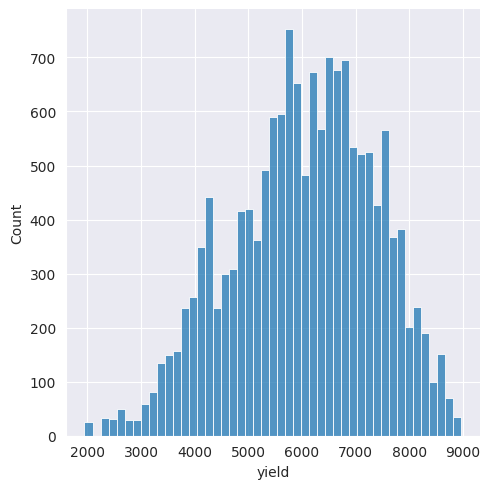

In [8]:
sns.displot(train['yield'])


## Pairplot of the train dataset

### Distribution of Train vs Test data

* The distribution of Test and Train datasets seem to align

In [9]:
y = train['yield']
train.drop(columns=['yield','id'],axis=1,inplace=True)
X = train.copy()

### Distribution of Train and Test look synonimous

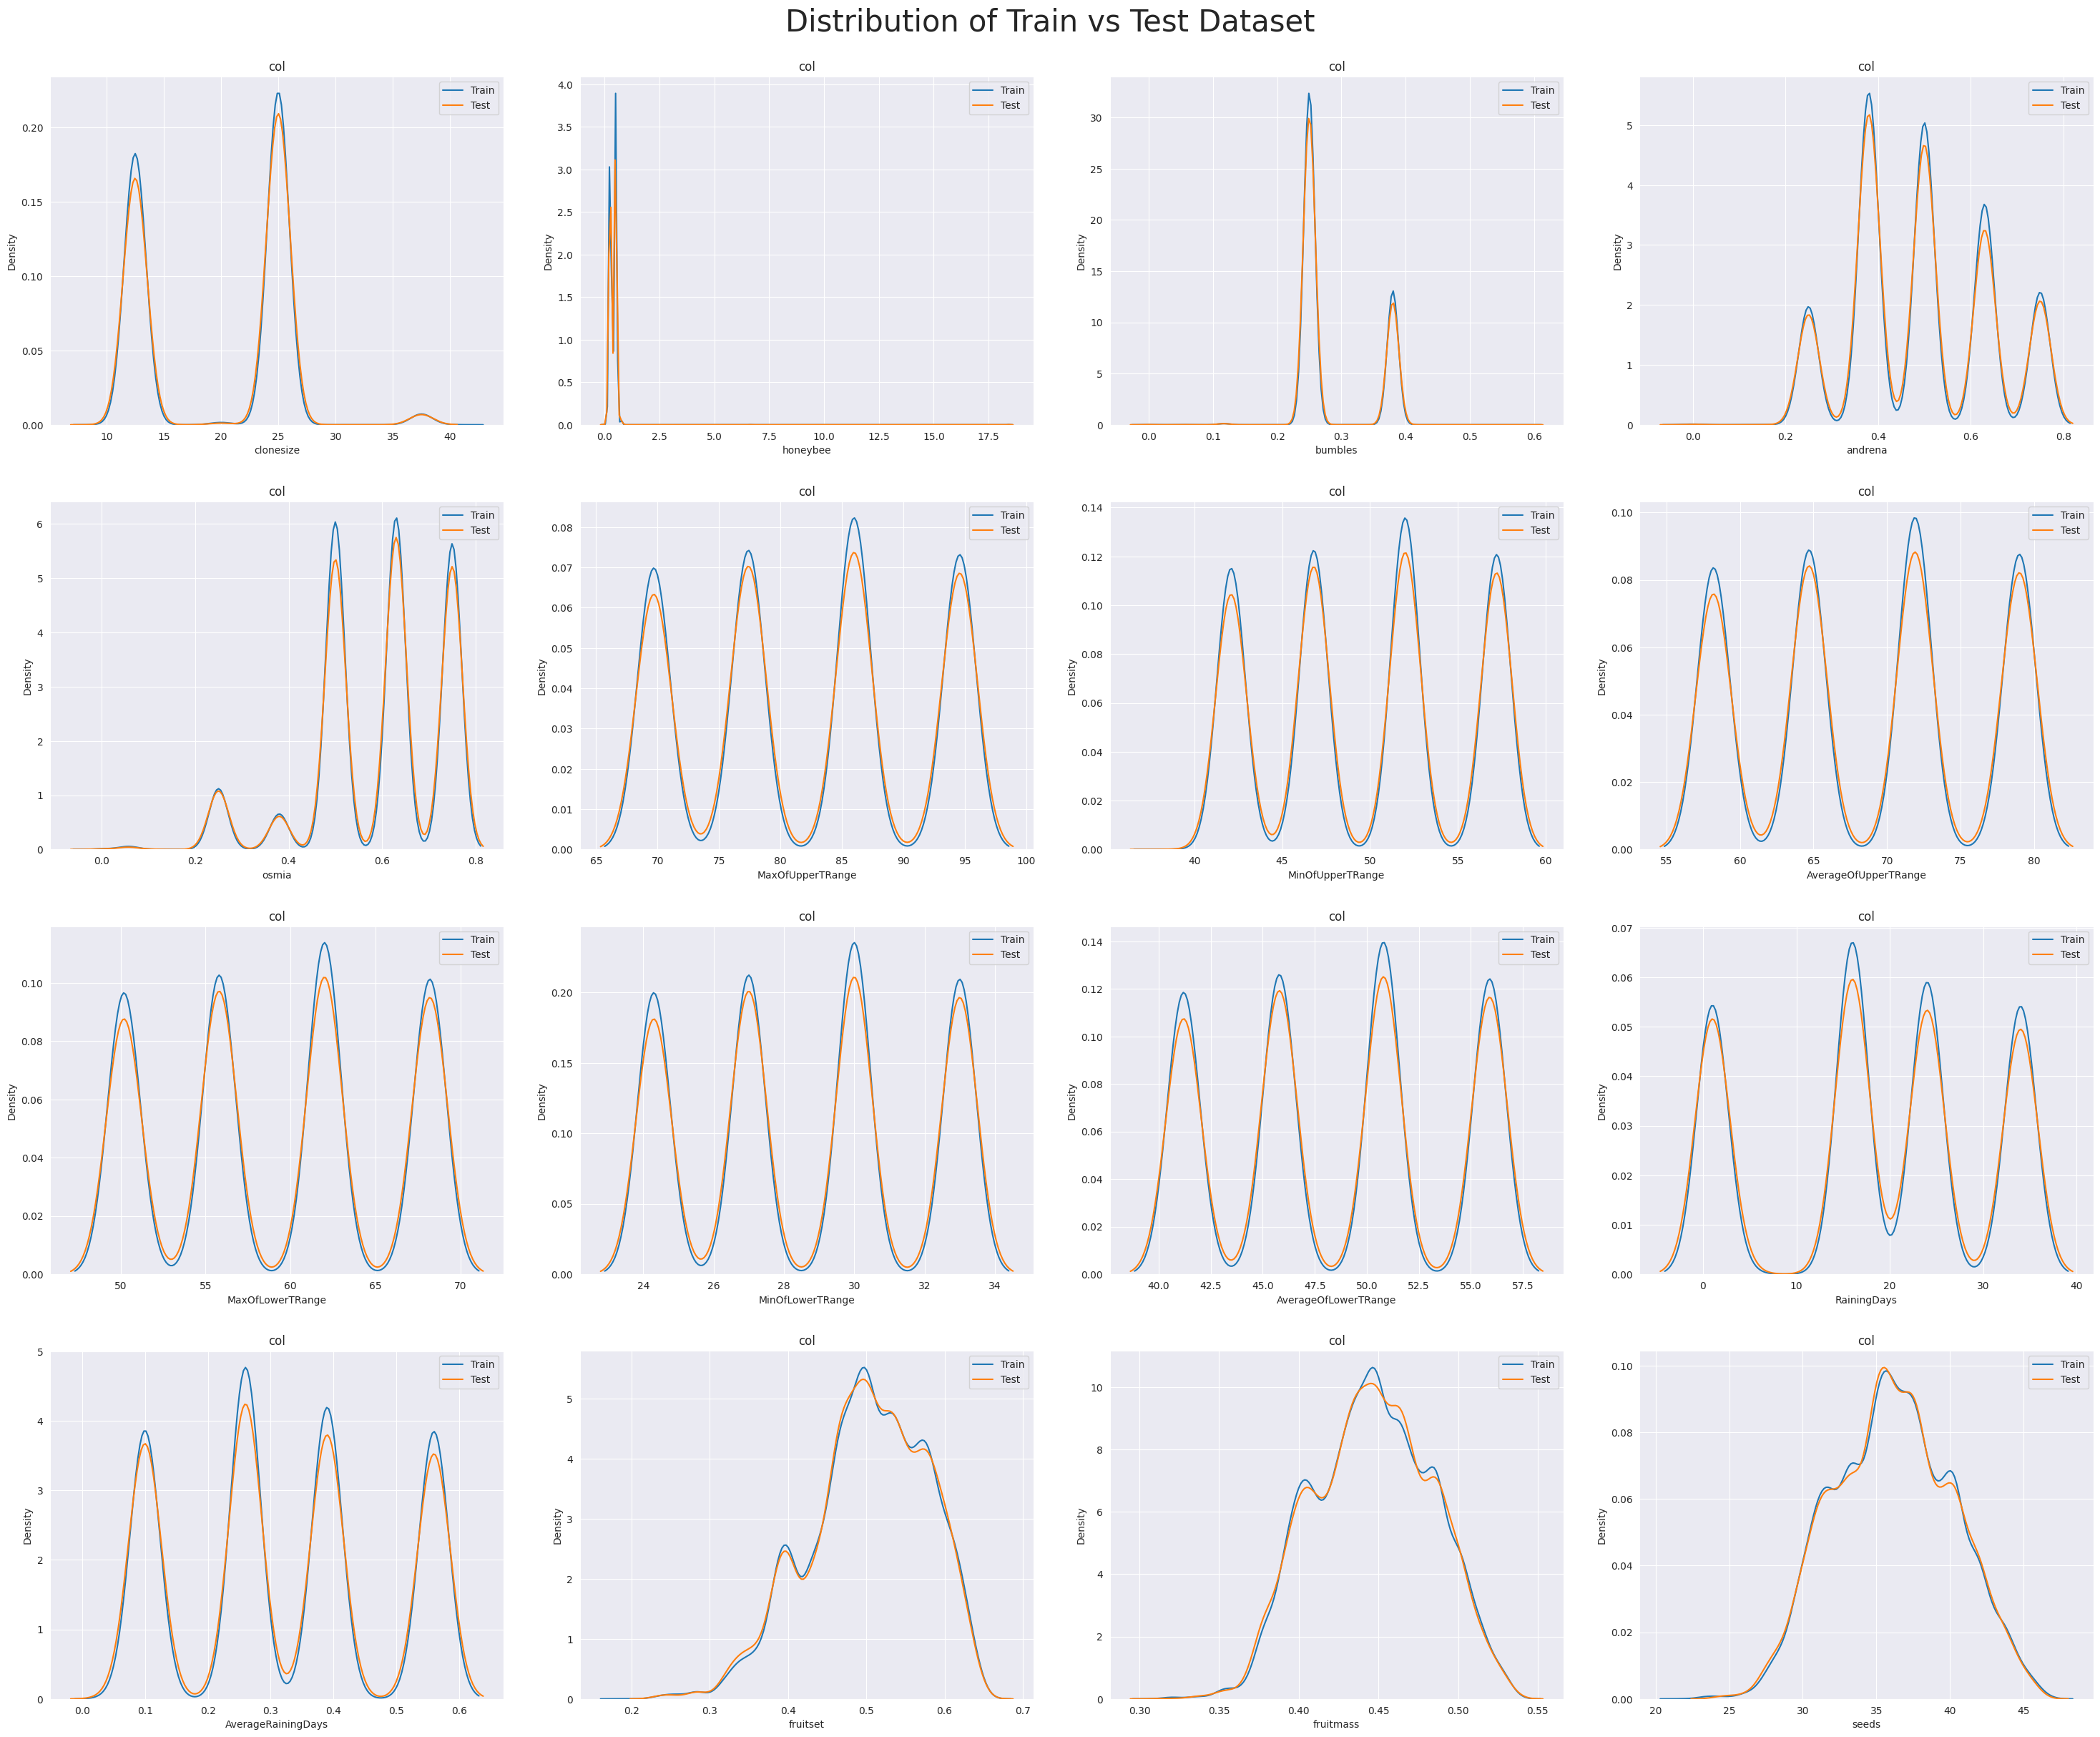

In [10]:

fig,ax = plt.subplots(int(np.ceil(len(X.columns)/4)),4, figsize = (30,25))
for i,col in enumerate(X.columns):
    ax = np.ravel(ax)

    sns.kdeplot(x= X[col] , label = 'Train', ax = ax[i])
    sns.kdeplot(x= test[col], label = 'Test', ax = ax[i] )
    
    ax[i].legend()
    ax[i].set_title(f"col")

plt.suptitle("Distribution of Train vs Test Dataset",fontsize = 30)
plt.tight_layout(pad =3)
plt.show()

### Correlation Matrix

* Dataset looks highly correlated with target field

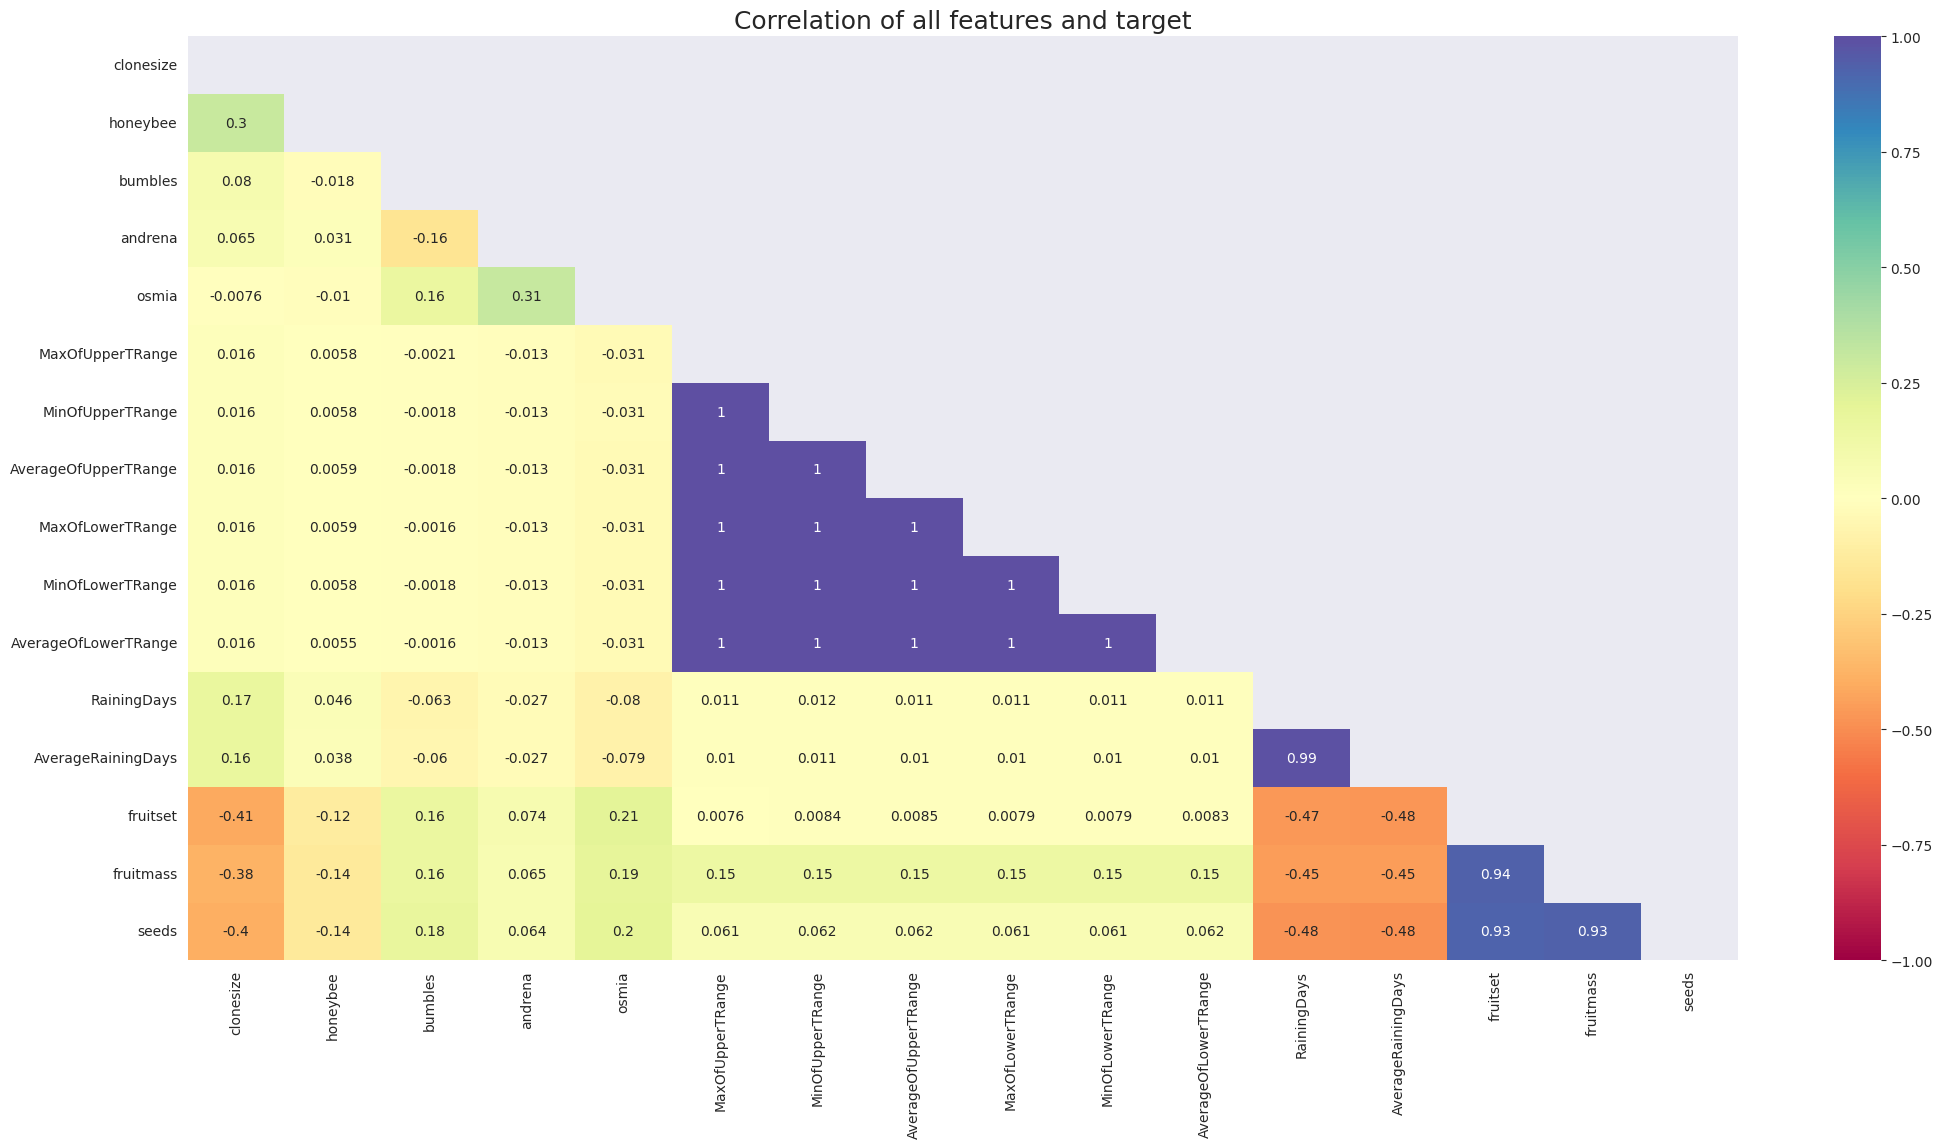

In [11]:
plt.figure(figsize = (25,12))

corr = train.corr()
upper_triangle = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "Spectral", annot = True, mask = upper_triangle)
plt.title("Correlation of all features and target", fontsize= 18)
plt.show()

### Outlier Analaysis

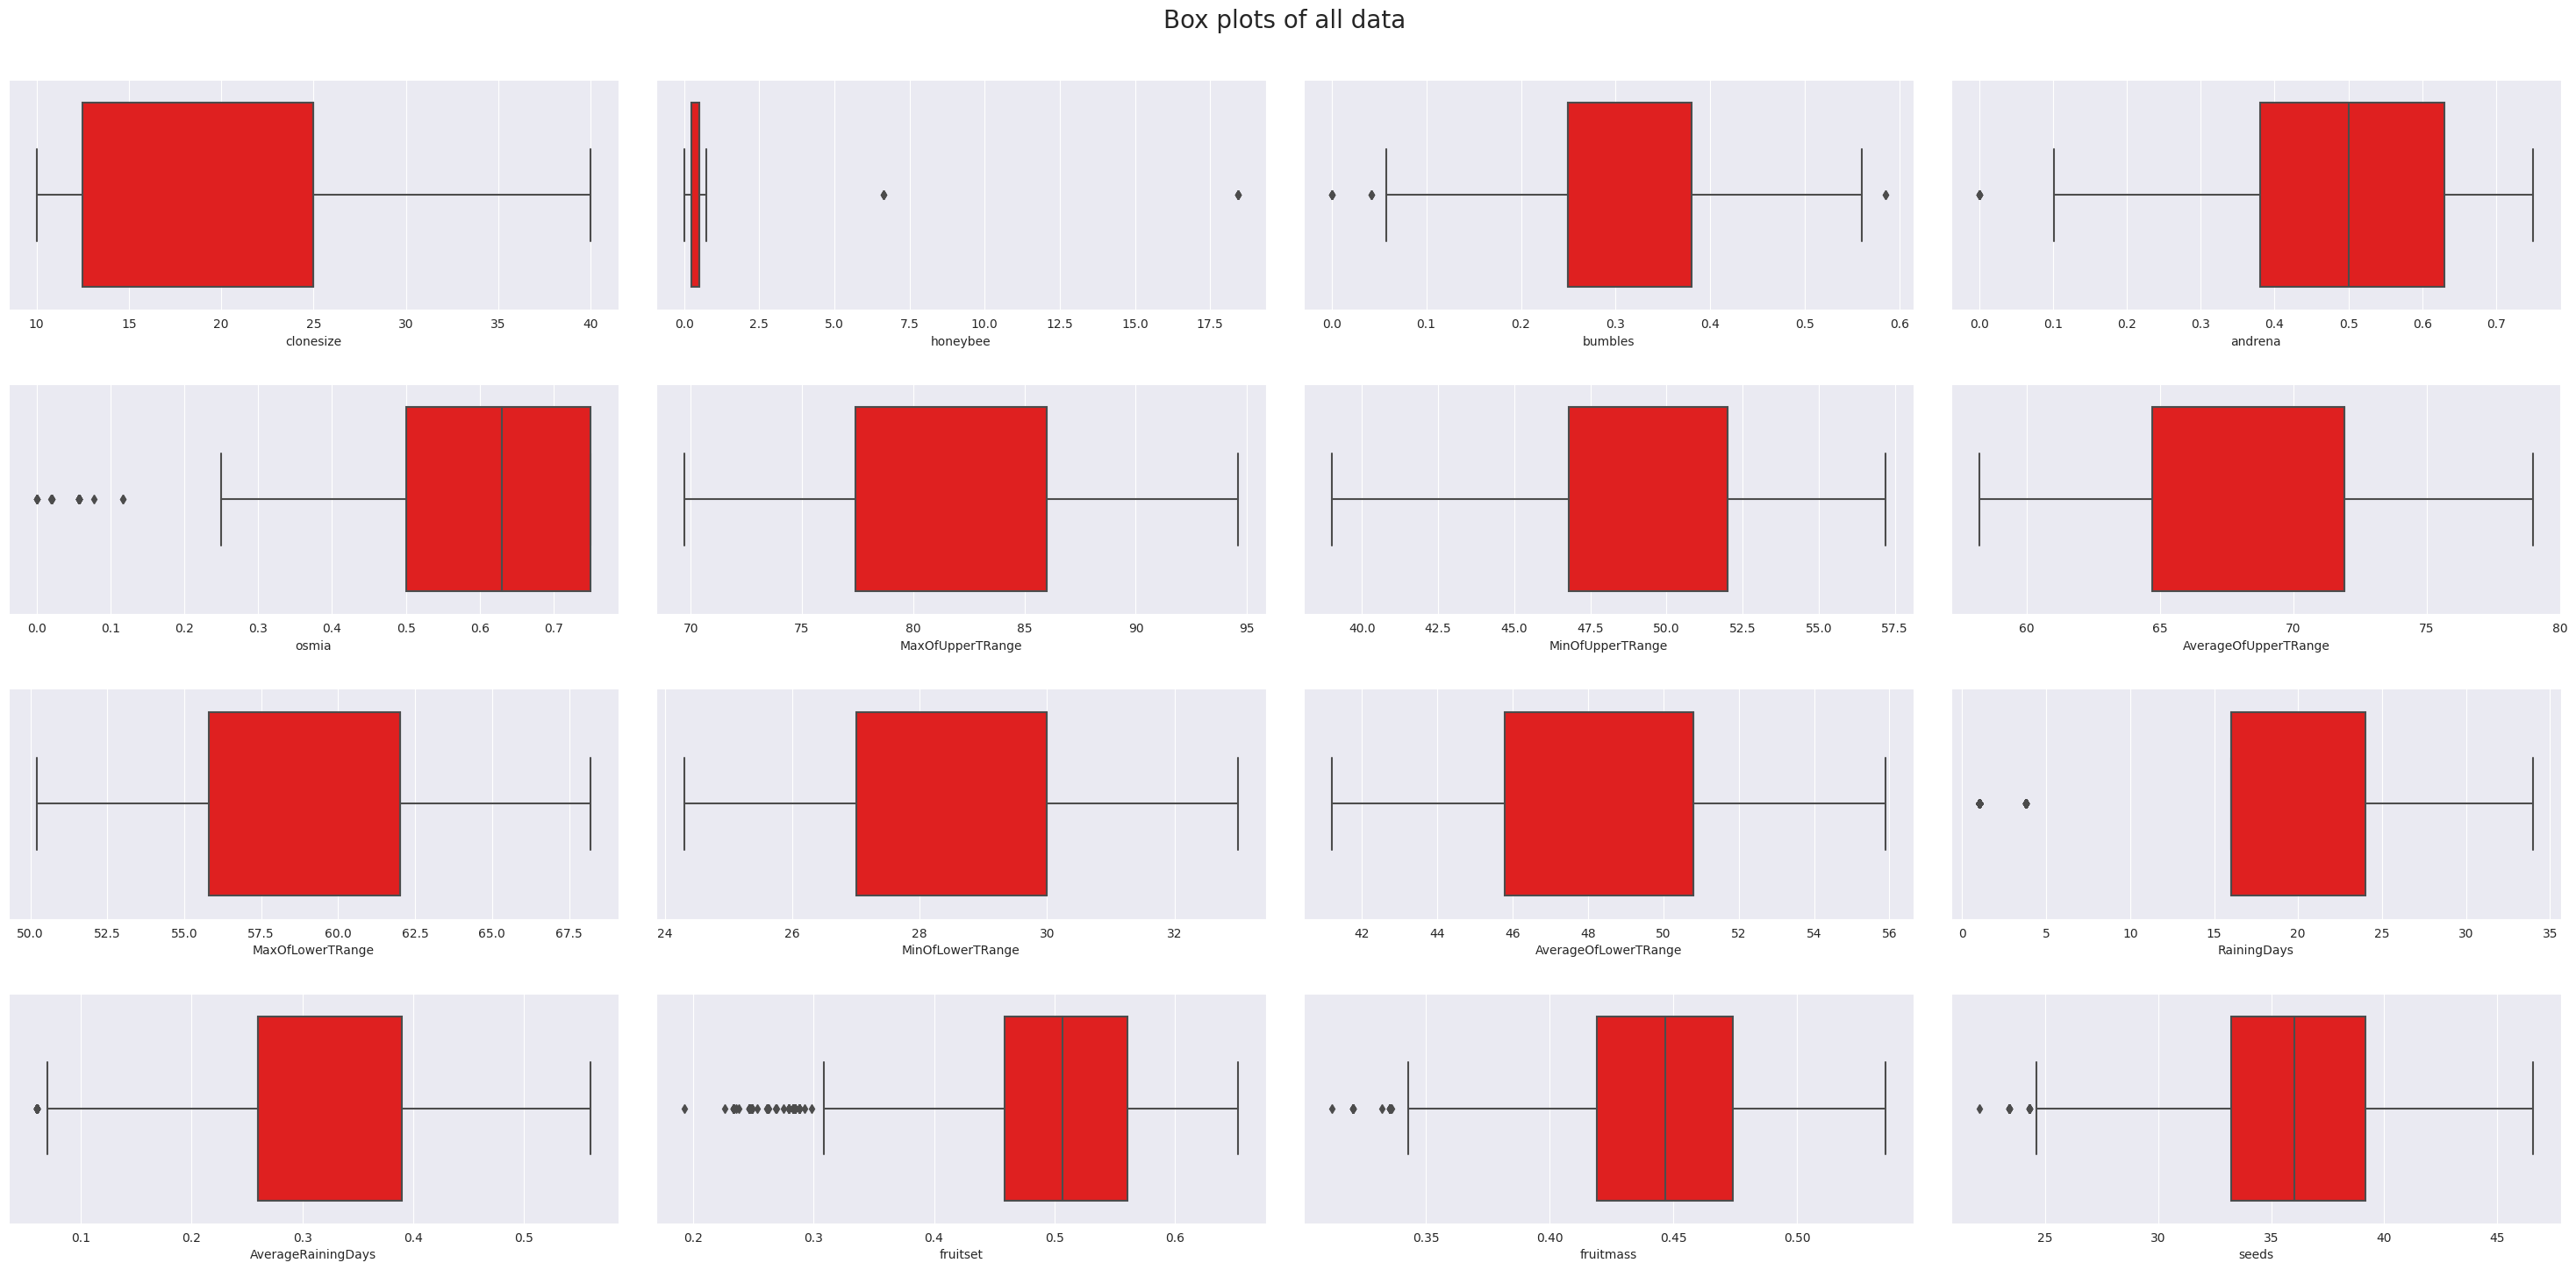

In [12]:
fig,ax = plt.subplots(int(np.ceil(len(X.columns)/4)),4,figsize = (30,15))
ax = np.ravel(ax)

for i,col in enumerate(X.columns):
    sns.boxplot(ax = ax[i], x = X[col], color= "red")

fig.suptitle("Box plots of all data ",fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

### Standardize the numerical features in the dataset

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
numerical_cols = list(X.select_dtypes(include=['int','float']))
X_numerical = scaler.fit_transform(X[numerical_cols].values)


### Convert target to numpy array

In [14]:
y = y.to_numpy()

### Split the train data into train test datasets for modelling

In [15]:
# Split the data into training and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_numerical,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12231, 16), (3058, 16), (12231,), (3058,))

### Generic Hyper parameters

In [25]:
# Model Parameters 
EPOCHS = 200
BATCH_SIZE = 32
LEARNING_RATE = 0.01

### Defining the Dataset and Dataloader classes for test and train

In [26]:
# Define the DataLoader for train and test data
from torch.utils.data import Dataset, DataLoader
# Train Data
class TrainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
# Test Data   
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

### Converting the dataset into torch tensor format

In [27]:
# Instantiate the Train and Test data class
import torch
train_data = TrainData(torch.tensor(data=X_train,dtype=torch.float32,requires_grad=True),
                       torch.tensor(data=y_train,dtype=torch.float32,requires_grad=True))
test_data = TestData(torch.tensor(data=X_test,dtype=torch.float32))

### Defining the iterator Dataloader

In [28]:
# Initialize the DataLoader 
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

### Defining the pytorch regression class

In [51]:
import torch

class RegressionBlueBerryNNet(torch.nn.Module):
    def __init__(self,input_features):
        super(RegressionBlueBerryNNet,self).__init__()
        # Number of input features is 16.
        self.input_layer = torch.nn.Linear(input_features,1)
        #self.dense_layer = torch.nn.Linear(8,1)
        #self.output_layer = torch.nn.Linear(32,1)
        
        self.relu = torch.nn.ReLU()
        #self.dropout = torch.nn.Dropout(p=0.1)
        #self.batchnorm_1 = torch.nn.BatchNorm1d(64)
        #self.batchnorm_2 = torch.nn.BatchNorm1d(64)
        
    
    def forward(self,inputs):
        x = self.relu(self.input_layer(inputs))
        #x = self.input_layer(inputs)
        #x = self.batchnorm_1(x)
        #x = self.dense_layer(x)
        #x = self.batchnorm_2(x)
        #x = self.dropout(x)
        #x = self.output_layer(x)
        return x

### Defining the code to run both on CPU and GPU

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Instantiating the model

In [53]:
model = RegressionBlueBerryNNet(X_train.shape[1])
model.to(device)
print(model)

RegressionBlueBerryNNet(
  (input_layer): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


### Defining the Loss and Optimizer 

In [54]:
# Define the loss and optimizer 
criterion = torch.nn.L1Loss() ## Mean Absolute Error
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE,momentum=0.9)

### Traning the Model :)

In [60]:
# Tain the model
from tqdm.notebook import tqdm
loss_list =[]
early_stopper = EarlyStopper(patience=3, min_delta=10)
model.train()
for e in tqdm(range(1, EPOCHS+1)):
    epoch_loss = 0.0
    epoch_acc = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        #mse_acc = accuracy_function(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
        loss_list.append(epoch_loss)
        
    if e%10 == 0:
        print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f}')
        

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 010: | Loss: 369.14997
Epoch 020: | Loss: 367.64955
Epoch 030: | Loss: 368.18783
Epoch 040: | Loss: 367.93496
Epoch 050: | Loss: 367.58758
Epoch 060: | Loss: 367.73846
Epoch 070: | Loss: 367.51265
Epoch 080: | Loss: 367.87589
Epoch 090: | Loss: 367.52307
Epoch 100: | Loss: 367.54899


In [62]:
# Evaluate the model

y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_pred_list

In [63]:
from sklearn.metrics import mean_absolute_error
accuracy=mean_absolute_error(y_test, y_pred_list)
print(accuracy)

366.1966915565729


### Executing model on test data

In [64]:
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [65]:
summary('test',test)

test shape: (10194, 17)


,dtypes,null,unique,min,median,max,mean,std,inf,duplicate
id,int64,0,10194,15289.000000,20385.500000,25482.000000,20385.500000,2942.898656,0,0
clonesize,float64,0,5,10.000000,25.000000,37.500000,19.795958,6.591864,0,0
honeybee,float64,0,7,0.000000,0.500000,18.430000,0.391606,0.390022,0,0
bumbles,float64,0,8,0.000000,0.250000,0.585000,0.286307,0.059867,0,0
andrena,float64,0,12,0.000000,0.500000,0.750000,0.491328,0.148166,0,0
osmia,float64,0,14,0.000000,0.630000,0.750000,0.593222,0.139897,0,0
MaxOfUpperTRange,float64,0,7,69.700000,86.000000,94.600000,82.207014,9.153442,0,0
MinOfUpperTRange,float64,0,6,39.000000,52.000000,57.200000,49.697204,5.552286,0,0
AverageOfUpperTRange,float64,0,6,58.200000,71.900000,79.000000,68.687816,7.647629,0,0
MaxOfLowerTRange,float64,0,5,50.200000,62.000000,68.200000,59.256465,6.617055,0,0
